In [32]:
import numpy as np
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Input cells

In [33]:
stat = pd.read_excel('data/excel/Section4_Statistical_Functions.xlsx', sheet_name='Salary Data')

In [34]:
weather = pd.read_excel('data/excel/Section3_Logical_Operators.xlsx')

In [35]:
ex = pd.read_excel('data/excel/Section2_Formulas100.xlsx')

### getting dd/mm/yy

In [36]:
ex['Birth Year'] = pd.DatetimeIndex(ex['Birth Date']).year

### getting first 3 characters form string

In [37]:
ex['Area Code'] = ex['Telephone'].str[:3]

### getting username from emails

In [38]:
ex['Username'] = ex['E-mail'].str.split('@').str[0]

### upload to excel

In [39]:
ex.to_excel('data/output/Section2_Formulas101.xlsx', index=False)

In [40]:
def freeze(x):
    if x < 32:
        return 'Yes'
    return 'No'

In [41]:
def climate(x):
    if x < 40:
        return 'Cold'
    elif x > 80:
        return 'Hot'
    return 'Mild'

In [42]:
weather['Freeze'] = weather['TEMP (F)'].apply(freeze)
weather['Climate'] = weather['TEMP (F)'].apply(climate)

In [43]:
def prcp(x,y):
    if x == 'Yes' and y > 0:
        return 'Snow'
    elif x == 'No' and y > 0:
        return 'Rain'
    return 'None'

In [44]:
weather['PRCP Type'] = np.vectorize(prcp)(weather['Freeze'], weather['PRCP (mm)'])

In [45]:
def conditions(x):
    if x == 'Snow':
        return 'Dry'
    return 'Wet'

In [46]:
weather['Conditions'] = weather['PRCP Type'].apply(conditions)

In [47]:
weather.to_excel('data/output/Section3_Logical.xlsx', index=False)

In [48]:
stat

,Year,Team,League,Player,Salary,Rank,% Rank
0,2010,ARI,NL,abreuto01,407000,NaN,NaN
1,2010,ARI,NL,boyerbl01,725000,NaN,NaN
2,2010,ARI,NL,drewst01,3400000,NaN,NaN
3,2010,ARI,NL,gutieju01,411000,NaN,NaN
4,2010,ARI,NL,harenda01,8250000,NaN,NaN
...,...,...,...,...,...,...,...
4129,2014,WAS,NL,storedr01,3450000,NaN,NaN
4130,2014,WAS,NL,strasst01,3975000,NaN,NaN
4131,2014,WAS,NL,werthja01,20000000,NaN,NaN
4132,2014,WAS,NL,zimmejo02,7500000,NaN,NaN


In [49]:
stat['Rank'] = stat['Salary'].rank(ascending=False)

In [50]:
stat['% Rank'] = stat['Salary'].rank(pct=True)

In [51]:
stat

,Year,Team,League,Player,Salary,Rank,% Rank
0,2010,ARI,NL,abreuto01,407000,4014.5,0.029149
1,2010,ARI,NL,boyerbl01,725000,2459.5,0.405298
2,2010,ARI,NL,drewst01,3400000,1318.0,0.681422
3,2010,ARI,NL,gutieju01,411000,3977.5,0.038099
4,2010,ARI,NL,harenda01,8250000,563.0,0.864054
...,...,...,...,...,...,...,...
4129,2014,WAS,NL,storedr01,3450000,1314.0,0.682390
4130,2014,WAS,NL,strasst01,3975000,1205.5,0.708636
4131,2014,WAS,NL,werthja01,20000000,65.0,0.984519
4132,2014,WAS,NL,zimmejo02,7500000,635.5,0.846517


In [52]:
ifs = stat.groupby(['Team', 'Year']).sum().unstack()

<AxesSubplot:xlabel='Team'>

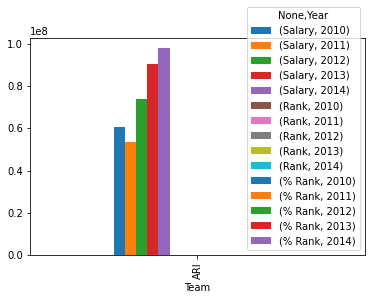

In [60]:
ifs.loc[['ARI']].plot(kind='bar')